In [ ]:
import numpy as np 
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
df= pd.read_csv('archivo.csv')

In [ ]:
df.head()

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [ ]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,30195701,mujer,16,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46323,30195701,mujer,76,otro_pariente,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46324,30202911,hombre,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0
46325,30202911,mujer,60,pareja,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0


In [ ]:
df= df[df['parentesco_jefe_hogar']=='jefe_hogar'].reset_index(drop=True)

In [ ]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,1050000.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,5000000.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0


In [ ]:
LISTAAELIMINAR = ['LLAVE_HOGAR','destino_depto','destino_municipio','destino_depto_12_meses','destino_municipio_12_meses','leer_escribir','ingresos_trabajo','ingresos_subsidios_ayudas','ingresos_jubilación_invalidez','ingresos_sostenimiento_menores','ingresos_subsidios_vivienda','ingresos_subsidios_educación','ingresos_arriendos_finca_raiz','ingresos_transferencias','ninguna_fuente_ingresos','principal_fuente_ingreso','ingreso_mensual_aprox_sin_fuentes']

In [ ]:
LISTAAELIMINAR

['LLAVE_HOGAR',
 'destino_depto',
 'destino_municipio',
 'destino_depto_12_meses',
 'destino_municipio_12_meses',
 'leer_escribir',
 'ingresos_trabajo',
 'ingresos_subsidios_ayudas',
 'ingresos_jubilación_invalidez',
 'ingresos_sostenimiento_menores',
 'ingresos_subsidios_vivienda',
 'ingresos_subsidios_educación',
 'ingresos_arriendos_finca_raiz',
 'ingresos_transferencias',
 'ninguna_fuente_ingresos',
 'principal_fuente_ingreso',
 'ingreso_mensual_aprox_sin_fuentes']

In [ ]:
df.drop(columns= LISTAAELIMINAR,inplace=True)

In [ ]:
df['gastos_totales']=df.fillna(0)[['gastos_alojamiento_valor','gastos_transporte_valor','gastos_trans_publico_lugar_valor','gastos_bienes_personales_valor','gastos_regalos_valor','gastos_otros_valor','gastos_transporte_aereo_valor']].sum(axis=1)

In [ ]:
df

,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,...,gastos_transporte_aereo_valor,nivel_educativo,grado_alcanzado,diploma_obtenido,area,estrato,num_noches,tipo_vivienda,ingreso_mensual_aprox,gastos_totales
0,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,880000.0,0.0
1,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_secundaria,9.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,860000.0,0.0
2,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,1050000.0,0.0
3,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,820000.0,0.0
4,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,ANTIOQUIA,1.0,NaN,apartamento,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,7.0,postgrado,HUILA,2.0,NaN,casa,9000000.0,0.0
14025,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,3.0,tecnico_tecnologo,CHOCO,1.0,NaN,apartamento,828116.0,0.0
14026,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SUCRE,4.0,NaN,casa,5000000.0,0.0
14027,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SAN ANDRES,3.0,NaN,casa,3800000.0,0.0


##Punto 1

In [ ]:
df.tail()

,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,...,gastos_transporte_aereo_valor,nivel_educativo,grado_alcanzado,diploma_obtenido,area,estrato,num_noches,tipo_vivienda,ingreso_mensual_aprox,gastos_totales
14024,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,7.0,postgrado,HUILA,2.0,NaN,casa,9000000.0,0.0
14025,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,3.0,tecnico_tecnologo,CHOCO,1.0,NaN,apartamento,828116.0,0.0
14026,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SUCRE,4.0,NaN,casa,5000000.0,0.0
14027,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SAN ANDRES,3.0,NaN,casa,3800000.0,0.0
14028,hombre,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,150000.0,2.0,NaN,...,NaN,media,11.0,bachiller,RISARALDA,2.0,1.0,casa,4000000.0,150000.0


In [ ]:
df.head()

,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,...,gastos_transporte_aereo_valor,nivel_educativo,grado_alcanzado,diploma_obtenido,area,estrato,num_noches,tipo_vivienda,ingreso_mensual_aprox,gastos_totales
0,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,880000.0,0.0
1,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_secundaria,9.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,860000.0,0.0
2,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,1050000.0,0.0
3,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,820000.0,0.0
4,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,ANTIOQUIA,1.0,NaN,apartamento,850000.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sexo                              14029 non-null  object 
 1   edad                              14029 non-null  int64  
 2   parentesco_jefe_hogar             14029 non-null  object 
 3   estado_civil                      14029 non-null  object 
 4   viaje_noche_fuera                 14029 non-null  object 
 5   motivo_viaje                      1618 non-null   object 
 6   compañía_viaje                    1618 non-null   object 
 7   monto_ultimo_viaje                1618 non-null   float64
 8   num_viajes_12_meses               1601 non-null   float64
 9   gastos_alojamiento_valor          360 non-null    float64
 10  gastos_transporte_valor           1231 non-null   float64
 11  gastos_trans_publico_lugar_valor  439 non-null    float64
 12  gast

In [ ]:
df.describe()

,edad,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,grado_alcanzado,estrato,ingreso_mensual_aprox,gastos_totales
count,14029.000000,1.618000e+03,1601.000000,3.600000e+02,1.231000e+03,439.000000,2.640000e+02,2.630000e+02,3.890000e+02,1.570000e+02,14029.000000,14017.000000,1.379300e+04,1.402900e+04
mean,50.038278,5.962915e+05,2.157402,3.237938e+05,1.168650e+05,65759.412301,1.353931e+05,1.461878e+05,1.427845e+05,4.645215e+05,6.310856,2.261540,1.604475e+06,3.506730e+04
std,16.335275,1.032644e+06,4.476350,5.682872e+05,1.437931e+05,87044.725580,2.156579e+05,1.883994e+05,2.082027e+05,5.724374e+05,3.900489,1.109295,1.651129e+06,2.208980e+05
min,15.000000,0.000000e+00,1.000000,9.800000e+01,9.800000e+01,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000,0.000000,9.800000e+01,0.000000e+00
25%,37.000000,1.100000e+05,1.000000,6.000000e+04,4.000000e+04,20000.000000,3.000000e+04,5.000000e+04,4.000000e+04,2.000000e+05,3.000000,1.000000,8.000000e+05,0.000000e+00
50%,50.000000,3.000000e+05,1.000000,1.500000e+05,7.800000e+04,40000.000000,6.000000e+04,1.000000e+05,9.000000e+04,3.000000e+05,5.000000,2.000000,1.128000e+06,0.000000e+00
75%,62.000000,6.000000e+05,1.000000,3.000000e+05,1.500000e+05,80000.000000,1.500000e+05,2.000000e+05,1.700000e+05,5.100000e+05,11.000000,3.000000,2.000000e+06,0.000000e+00
max,102.000000,1.436000e+07,98.000000,5.000000e+06,2.000000e+06,800000.000000,1.600000e+06,1.500000e+06,1.900000e+06,4.000000e+06,99.000000,9.000000,3.000000e+07,8.000000e+06


In [ ]:
df.duplicated().sum()

19

In [ ]:
df.drop_duplicates()

,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,...,gastos_transporte_aereo_valor,nivel_educativo,grado_alcanzado,diploma_obtenido,area,estrato,num_noches,tipo_vivienda,ingreso_mensual_aprox,gastos_totales
0,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,880000.0,0.0
1,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_secundaria,9.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,860000.0,0.0
2,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,1050000.0,0.0
3,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,basica_primaria,5.0,NaN,ANTIOQUIA,1.0,NaN,apartamento,820000.0,0.0
4,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,ANTIOQUIA,1.0,NaN,apartamento,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,7.0,postgrado,HUILA,2.0,NaN,casa,9000000.0,0.0
14025,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,superior_universitaria,3.0,tecnico_tecnologo,CHOCO,1.0,NaN,apartamento,828116.0,0.0
14026,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SUCRE,4.0,NaN,casa,5000000.0,0.0
14027,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,NaN,...,NaN,media,11.0,bachiller,SAN ANDRES,3.0,NaN,casa,3800000.0,0.0


In [ ]:
df.duplicated().sum()

2693

In [ ]:
df.isna().sum()

sexo                                    0
edad                                    0
parentesco_jefe_hogar                   0
estado_civil                            0
viaje_noche_fuera                       0
motivo_viaje                        12411
compañía_viaje                      12411
monto_ultimo_viaje                  12411
num_viajes_12_meses                 12428
gastos_alojamiento_valor            13669
gastos_transporte_valor             12798
gastos_trans_publico_lugar_valor    13590
gastos_bienes_personales_valor      13765
gastos_regalos_valor                13766
gastos_otros_valor                  13640
gastos_transporte_aereo_valor       13872
nivel_educativo                         0
grado_alcanzado                         0
diploma_obtenido                     5484
area                                    0
estrato                                12
num_noches                          12411
tipo_vivienda                           0
ingreso_mensual_aprox             

In [ ]:
LISTAAELIMINAR2 = ['sexo','motivo_viaje','compañía_viaje','monto_ultimo_viaje','num_viajes_12_meses','gastos_alojamiento_valor','gastos_transporte_valor','gastos_trans_publico_lugar_valor','gastos_bienes_personales_valor','gastos_regalos_valor','gastos_otros_valor','gastos_transporte_aereo_valor','diploma_obtenido','num_noches','tipo_vivienda','nivel_educativo','grado_alcanzado','area']

In [ ]:
df.drop(columns=LISTAAELIMINAR2,inplace=True)

In [ ]:
df

,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,jefe_hogar,soltero,no,1.0,880000.0,0.0
1,39,jefe_hogar,separado_divorciado,no,1.0,860000.0,0.0
2,68,jefe_hogar,viudo,no,1.0,1050000.0,0.0
3,34,jefe_hogar,pareja_no_union_libre,no,1.0,820000.0,0.0
4,25,jefe_hogar,pareja_union_libre,no,1.0,850000.0,0.0
...,...,...,...,...,...,...,...
14024,63,jefe_hogar,casado,no,2.0,9000000.0,0.0
14025,66,jefe_hogar,separado_divorciado,no,1.0,828116.0,0.0
14026,71,jefe_hogar,casado,no,4.0,5000000.0,0.0
14027,50,jefe_hogar,casado,no,3.0,3800000.0,0.0


In [ ]:
df.drop_duplicates()

,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,jefe_hogar,soltero,no,1.0,880000.0,0.0
1,39,jefe_hogar,separado_divorciado,no,1.0,860000.0,0.0
2,68,jefe_hogar,viudo,no,1.0,1050000.0,0.0
3,34,jefe_hogar,pareja_no_union_libre,no,1.0,820000.0,0.0
4,25,jefe_hogar,pareja_union_libre,no,1.0,850000.0,0.0
...,...,...,...,...,...,...,...
14024,63,jefe_hogar,casado,no,2.0,9000000.0,0.0
14025,66,jefe_hogar,separado_divorciado,no,1.0,828116.0,0.0
14026,71,jefe_hogar,casado,no,4.0,5000000.0,0.0
14027,50,jefe_hogar,casado,no,3.0,3800000.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   14029 non-null  int64  
 1   parentesco_jefe_hogar  14029 non-null  object 
 2   estado_civil           14029 non-null  object 
 3   viaje_noche_fuera      14029 non-null  object 
 4   estrato                14017 non-null  float64
 5   ingreso_mensual_aprox  13793 non-null  float64
 6   gastos_totales         14029 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 767.3+ KB


In [ ]:
LISTAAELMINAR3=['parentesco_jefe_hogar']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   14029 non-null  int64  
 1   estado_civil           14029 non-null  object 
 2   viaje_noche_fuera      14029 non-null  object 
 3   estrato                14017 non-null  float64
 4   ingreso_mensual_aprox  13793 non-null  float64
 5   gastos_totales         14029 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 657.7+ KB


(array([12361.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1668.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

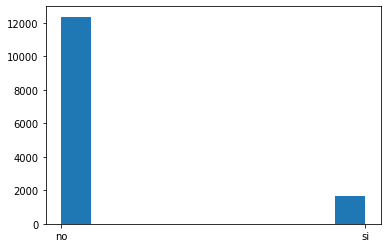

In [ ]:
plt.hist(df['viaje_noche_fuera'])

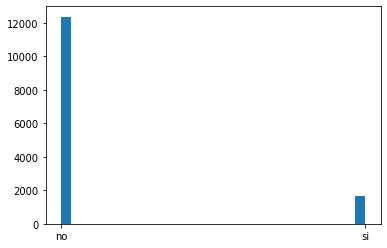

In [ ]:
plt.hist(df[data=df, y='viaje_noche_fuera', x='status'],bins=30)
plt.show()

##Modelo

In [ ]:
df= df.replace({'viaje_noche_fuera':{'si':1,'no':0}})

In [ ]:
df

,edad,estado_civil,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,soltero,0,1.0,880000.0,0.0
1,39,separado_divorciado,0,1.0,860000.0,0.0
2,68,viudo,0,1.0,1050000.0,0.0
3,34,pareja_no_union_libre,0,1.0,820000.0,0.0
4,25,pareja_union_libre,0,1.0,850000.0,0.0
...,...,...,...,...,...,...
14024,63,casado,0,2.0,9000000.0,0.0
14025,66,separado_divorciado,0,1.0,828116.0,0.0
14026,71,casado,0,4.0,5000000.0,0.0
14027,50,casado,0,3.0,3800000.0,0.0


In [ ]:
LISTAAELIMINAR4= ['estado_civil']

In [ ]:
df= df.dropna()

In [ ]:
df

,edad,viaje_noche_fuera,estrato,ingreso_mensual_aprox,gastos_totales
0,56,0,1.0,880000.0,0.0
1,39,0,1.0,860000.0,0.0
2,68,0,1.0,1050000.0,0.0
3,34,0,1.0,820000.0,0.0
4,25,0,1.0,850000.0,0.0
...,...,...,...,...,...
14024,63,0,2.0,9000000.0,0.0
14025,66,0,1.0,828116.0,0.0
14026,71,0,4.0,5000000.0,0.0
14027,50,0,3.0,3800000.0,0.0


In [ ]:
y=df['viaje_noche_fuera']
X=df[['edad','estrato','ingreso_mensual_aprox','gastos_totales']]
X=sm.add_constant(X)
model= sm.OLS(y,X)
reg= model.fit()
reg.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     902.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        07:18:43   Log-Likelihood:                -2414.5
No. Observations:               13781   AIC:                             4839.
Df Residuals:                   13776   BIC:                             4877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0985      0.009     11.123      0.000       0.081       0.116
edad                     -0.0017      0.000    -10.881      0.000      -0.002      -0.001
estrato                   0.0294      0.003     11.747      0.000       0.024       0.034
ingreso_mensual_aprox  9.978e-09   1.69e-09      5.899      0.000    6.66e-09    1.33e-08
gastos_totales         5.937e-07   1.13e-08     52.521      0.000    5.72e-07    6.16e-07
==============================================================================
Omnibus:                     5609.756   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55479.611
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##3 punto

#Estimacion modelo bivariado de probabilidad de viajar o no

In [ ]:
vjnf= df['viaje_noche_fuera'].value_counts()

In [ ]:
vjnf.index

Int64Index([0, 1], dtype='int64')

In [ ]:
vjnf.values

array([12140,  1641])

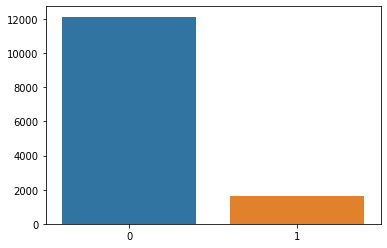

In [ ]:
sns.barplot(x=vjnf.index, y=vjnf.values)

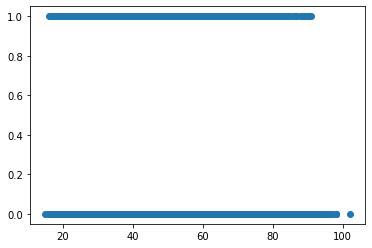

In [ ]:
plt.scatter(df['edad'],df['viaje_noche_fuera'])


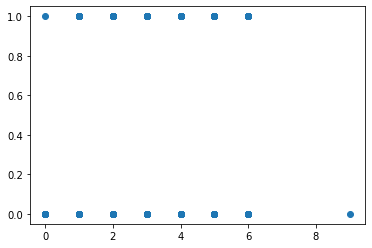

In [ ]:
plt.scatter(df['estrato'],df['viaje_noche_fuera'])

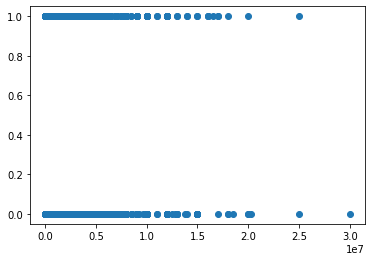

In [ ]:
plt.scatter(df['ingreso_mensual_aprox'],df['viaje_noche_fuera'])

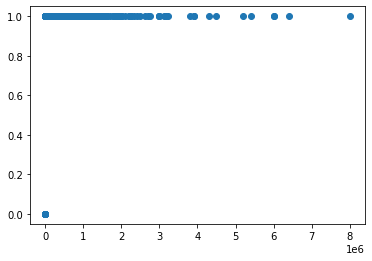

In [ ]:
plt.scatter(df['gastos_totales'],df['viaje_noche_fuera'])

#en la primera grafica vemos la probabilidad de cuantas personas viajan y cuantas no, en las siguientes graficas se compara la variable dependiente con las independientes 

##PUNTO 4

#Podemos evidenciar que las cuatro variables influyen para la desicion de si viajar o no, por que cada variable nos permite estimar el modelo para mirar que afectaciones tiene para la decision de las personas si viajan o no viajan

##Integrantes:
 #Juan Esteban Aponte Sanchez
 #Daniel Felipe Agudelo Pinzon
 #Juan Camilo Lozada